# Starbucks Advertising Analysis

## Introduction

### Data

The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. 

Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

### Task

The task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, the goal is to maximize the following two metrics:

* **Incremental Response Rate (IRR)**, which is the difference between a ratio of the number of purchasers in the treatment group and a ratio of the number of purchasers in the control group.


$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue**, which is the revenue made or lost by sending out the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

Essentially, to maximize both of these metrics, we want to send users the treatment (promotion) only if they would not have purchased otherwise.

## Obtain Data

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

Let us load the data as a Pandas DataFrame.

In [2]:
# Load in the data
train_data = pd.read_csv('Data/training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [4]:
# Check for missing values
train_data.isna().any()

ID           False
Promotion    False
purchase     False
V1           False
V2           False
V3           False
V4           False
V5           False
V6           False
V7           False
dtype: bool

In [6]:
# Drop ID column
train_data = train_data.drop("ID", axis = 1)

# Check
train_data.head()

,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,No,0,2,30.443518,-1.165083,1,1,3,2
1,No,0,3,32.159350,-0.645617,2,3,2,2
2,No,0,2,30.431659,0.133583,1,1,4,2
3,No,0,0,26.588914,-0.212728,2,1,4,2
4,Yes,0,3,28.044332,-0.385883,1,1,2,2


## Explore Data

Let us first check whether there is any notable inbalance between control and treatment group.

In [7]:
train_data.groupby("Promotion").mean()

,purchase,V1,V2,V3,V4,V5,V6,V7
Promotion,,,,,,,,
No,0.007565,1.496277,29.976876,-0.007099,1.680270,2.330638,2.501565,1.702205
Yes,0.017019,1.505028,29.970338,0.007446,1.678949,2.324662,2.504225,1.701185


Let us create separate DataFrames for the promotion and non-promotion groups. We will then examine the difference between purchasers and non-purchasers in each group.

In [8]:
# Create DataFrames
promo = train_data[train_data['Promotion'] == 'Yes']
no_promo = train_data[train_data['Promotion'] == 'No']

### V1

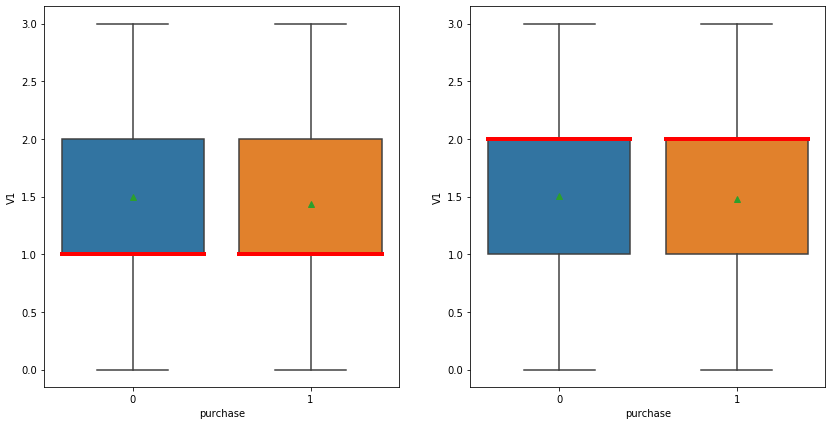

In [17]:
# Plot V1
fig, ax = plt.subplots(1,2, figsize = (14,7))
sns.boxplot(y="V1", x="purchase", data=no_promo, ax = ax[0], showmeans=True,
            medianprops=dict(linestyle='-', linewidth=4, color='r'))

sns.boxplot(y="V1", x="purchase", data=promo, ax = ax[1], showmeans=True,
            medianprops=dict(linestyle='-', linewidth=4, color='r'))
plt.show()

For both promo and no-promo group, the mean for purchase is slightly lower than no purchase. The spread of variables is roughly identical. This feature a